In [1]:
import numpy as np
import pandas as pd
from scipy.stats import linregress
from plotnine import *
import matplotlib.pyplot as plt
%matplotlib inline
import os
import warnings
warnings.simplefilter('ignore') # suppress plotnine warnings

DATA_PATH = os.path.join(".", "data")

def load_data(filename, data_path=DATA_PATH):
    file_path = os.path.join(data_path, filename)
    return pd.read_csv(file_path)

# Regime Diagram 

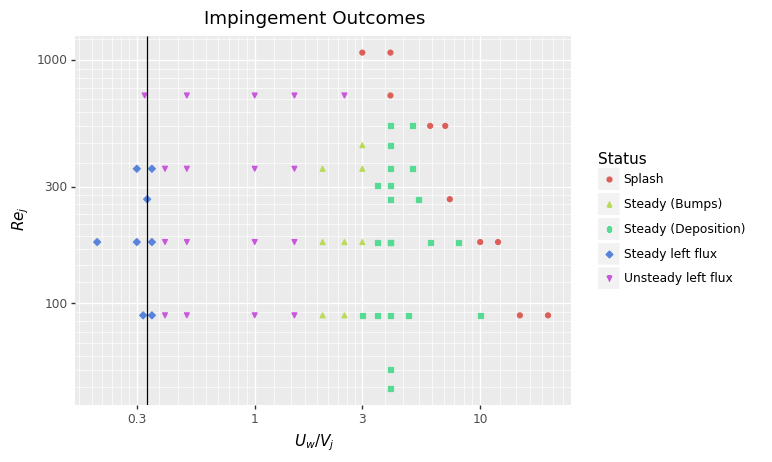

<ggplot: (295872811)>

In [11]:
regime = load_data("regime.csv")
regime['Re_j'] = regime['V_j'] * 1100 * 0.00065/0.04
regime['Re_w'] = regime['U_w'] * 1100 * 0.00065/0.04
regime['UV_Ratio'] = regime['U_w']/ regime['V_j']

(ggplot(regime)
     + aes(x="UV_Ratio", y="Re_j")
     + geom_point(aes(color="Status", shape="Status"))
     + scale_x_log10()
     + scale_y_log10()
     + geom_vline(xintercept = 1/3)
     + labs(title="Impingement Outcomes", x="$U_w/V_j$", y="$Re_j$")
)

# Data
Need to clarify the naming of the status... Instability/unstable/steady/unsteady... Which does "Hydraulic jump" belong to?

In [4]:
regime['We'] = regime['V_j']**2 * 1100 * 0.00065/regime['sigma']
regime['Ca'] = regime['V_j'] * 0.04 / regime['sigma']
# regime.sort_values(by=['UV_Ratio', 'Re_j'])
regime.sort_values(by=['Re_j', 'UV_Ratio'])

,V_j,U_w,Status,sigma,Re_j,Re_w,UV_Ratio,We,Ca
42,2.5,10.00,Steady (Deposition),0.072,44.6875,178.75000,4.000000,62.065972,1.388889
41,3.0,12.00,Steady (Deposition),0.072,53.6250,214.50000,4.000000,89.375000,1.666667
15,5.0,1.60,Steady left flux,0.072,89.3750,28.60000,0.320000,248.263889,2.777778
8,5.0,1.75,Steady left flux,0.072,89.3750,31.28125,0.350000,248.263889,2.777778
11,5.0,2.00,Unsteady left flux,0.072,89.3750,35.75000,0.400000,248.263889,2.777778
14,5.0,2.50,Unsteady left flux,0.072,89.3750,44.68750,0.500000,248.263889,2.777778
24,5.0,5.00,Unsteady left flux,0.072,89.3750,89.37500,1.000000,248.263889,2.777778
25,5.0,7.50,Unsteady left flux,0.072,89.3750,134.06250,1.500000,248.263889,2.777778
6,5.0,10.00,Steady (Bumps),0.072,89.3750,178.75000,2.000000,248.263889,2.777778
5,5.0,15.00,Steady (Deposition),0.072,89.3750,268.12500,3.000000,248.263889,2.777778
